In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import randn
import numpy as np

In [2]:
sample_df = pd.read_csv("LeaveTimes_MAY_39A.csv")
#sample_df = sample_df.drop(['Passengers', 'Passengersin','Distance', 'Suppresed','JustificationId','LastUpdate','Note'], axis=1)
days = sample_df.DayOfService.unique()
print(days)

['2017-05-23' '2017-05-27' '2017-05-29' '2017-05-30' '2017-05-26'
 '2017-05-28' '2017-05-24' '2017-05-31' '2017-05-25' '2017-05-02'
 '2017-05-03' '2017-05-22' '2017-05-11' '2017-05-04' '2017-05-15'
 '2017-05-16' '2017-05-05' '2017-05-21' '2017-05-19' '2017-05-18'
 '2017-05-12' '2017-05-06' '2017-05-09' '2017-05-13' '2017-05-08'
 '2017-05-07' '2017-05-01' '2017-05-14']


In [3]:
sample_df = sample_df.drop_duplicates(subset=None, keep='first', inplace=False)

In [4]:
sample_df['StopPointId'].unique()

array([1478,  313, 4492, 1698, 1479, 7048, 1861, 1699,  315, 1862, 1700,
       7388, 1863, 1701,  335, 7017, 1864, 1702,  349, 1865, 1703,  404,
       7030, 1866, 1850, 7021, 1867, 1906, 6111, 1907, 6112, 1908, 6113,
       7166, 1713, 1858, 1847, 1714, 1859, 1696, 1860, 1697, 7453,  759,
        760,  762,  763,  747,  767,  749,  750,  751,  752,  754,  755,
        756,  757,  758, 7158, 7018, 1898, 1845, 1905, 1909,  748,  753,
        761, 7389, 1870, 1874, 1877, 1899, 6108, 7047, 1879, 6107, 6110,
       7020, 7029, 7038, 2171, 7160, 1806,  768, 1660,  769, 1661, 1876,
        770, 7576, 1664,  771, 7586, 1665,  772, 7587,  773, 7588,  774,
        328, 7167,  776, 1444, 1808,  777, 1445,  779, 1647, 7025,  780,
       1648,  781, 1649, 1869,  782, 1911,  783, 1913, 1872,  784, 1914,
       1873,  786, 1805,  775,  785, 1443, 1662, 1666, 1807, 4464, 1871,
       1875, 1878, 6109, 7011, 7161, 7162, 7159, 4489, 4747, 1715,  793])

In [7]:
count = 0

D = []
L = []
E = []
for day in days:
    oneday_df = sample_df[(sample_df['StopPointId']==1713) & (sample_df['DayOfService']==day)]
    oneday_df['isDelay'] = 0
    for i in oneday_df.index:
        #print(oneday_df.loc[i])
        #print(i)
        oneday_df['isDelay'].loc[i] = oneday_df['ActualTime_Arr'].loc[i] - oneday_df['PlannedTime_Arr'].loc[i]
    lateTimes = oneday_df[(oneday_df['isDelay'] >= 0)].isDelay.count()
    earlyTimes = oneday_df[(oneday_df['isDelay'] < 0)].isDelay.count()
    if lateTimes == 0 and earlyTimes == 0:
        continue
    D.append(day)
    L.append(lateTimes)
    E.append(earlyTimes)
    plot_df = pd.DataFrame({'Date': D, 'LateTimes': L, 'EarlyTimes': E})
    #if count == 3:
    #    break
    #else:
    #    count += 1
    print("{}, lateTimes: {}, earlyTimes: {}".format(day, lateTimes, earlyTimes))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


2017-05-23, lateTimes: 66, earlyTimes: 18
2017-05-29, lateTimes: 11, earlyTimes: 1
2017-05-30, lateTimes: 69, earlyTimes: 16
2017-05-26, lateTimes: 7, earlyTimes: 1
2017-05-28, lateTimes: 7, earlyTimes: 3
2017-05-31, lateTimes: 63, earlyTimes: 15
2017-05-25, lateTimes: 5, earlyTimes: 2
2017-05-02, lateTimes: 41, earlyTimes: 48
2017-05-03, lateTimes: 59, earlyTimes: 33
2017-05-22, lateTimes: 39, earlyTimes: 19
2017-05-11, lateTimes: 61, earlyTimes: 27
2017-05-04, lateTimes: 56, earlyTimes: 28
2017-05-05, lateTimes: 56, earlyTimes: 36
2017-05-12, lateTimes: 58, earlyTimes: 29
2017-05-06, lateTimes: 37, earlyTimes: 29
2017-05-13, lateTimes: 36, earlyTimes: 27
2017-05-08, lateTimes: 42, earlyTimes: 42
2017-05-07, lateTimes: 30, earlyTimes: 8
2017-05-14, lateTimes: 22, earlyTimes: 9


In [8]:
my_plot = plot_df.copy()

In [9]:
my_plot = my_plot.sort_values(by='Date').reset_index(drop=True)

In [10]:
my_plot

,Date,EarlyTimes,LateTimes
0,2017-05-02,48,41
1,2017-05-03,33,59
2,2017-05-04,28,56
3,2017-05-05,36,56
4,2017-05-06,29,37
5,2017-05-07,8,30
6,2017-05-08,42,42
7,2017-05-11,27,61
8,2017-05-12,29,58
9,2017-05-13,27,36


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import randn
import numpy as np

[Text(0,0,'2017-05-02'),
 Text(0,0,'2017-05-03'),
 Text(0,0,'2017-05-04'),
 Text(0,0,'2017-05-05'),
 Text(0,0,'2017-05-06'),
 Text(0,0,'2017-05-07'),
 Text(0,0,'2017-05-08'),
 Text(0,0,'2017-05-11'),
 Text(0,0,'2017-05-12'),
 Text(0,0,'2017-05-13'),
 Text(0,0,'2017-05-14'),
 Text(0,0,'2017-05-22'),
 Text(0,0,'2017-05-23'),
 Text(0,0,'2017-05-25'),
 Text(0,0,'2017-05-26'),
 Text(0,0,'2017-05-28'),
 Text(0,0,'2017-05-29'),
 Text(0,0,'2017-05-30'),
 Text(0,0,'2017-05-31')]

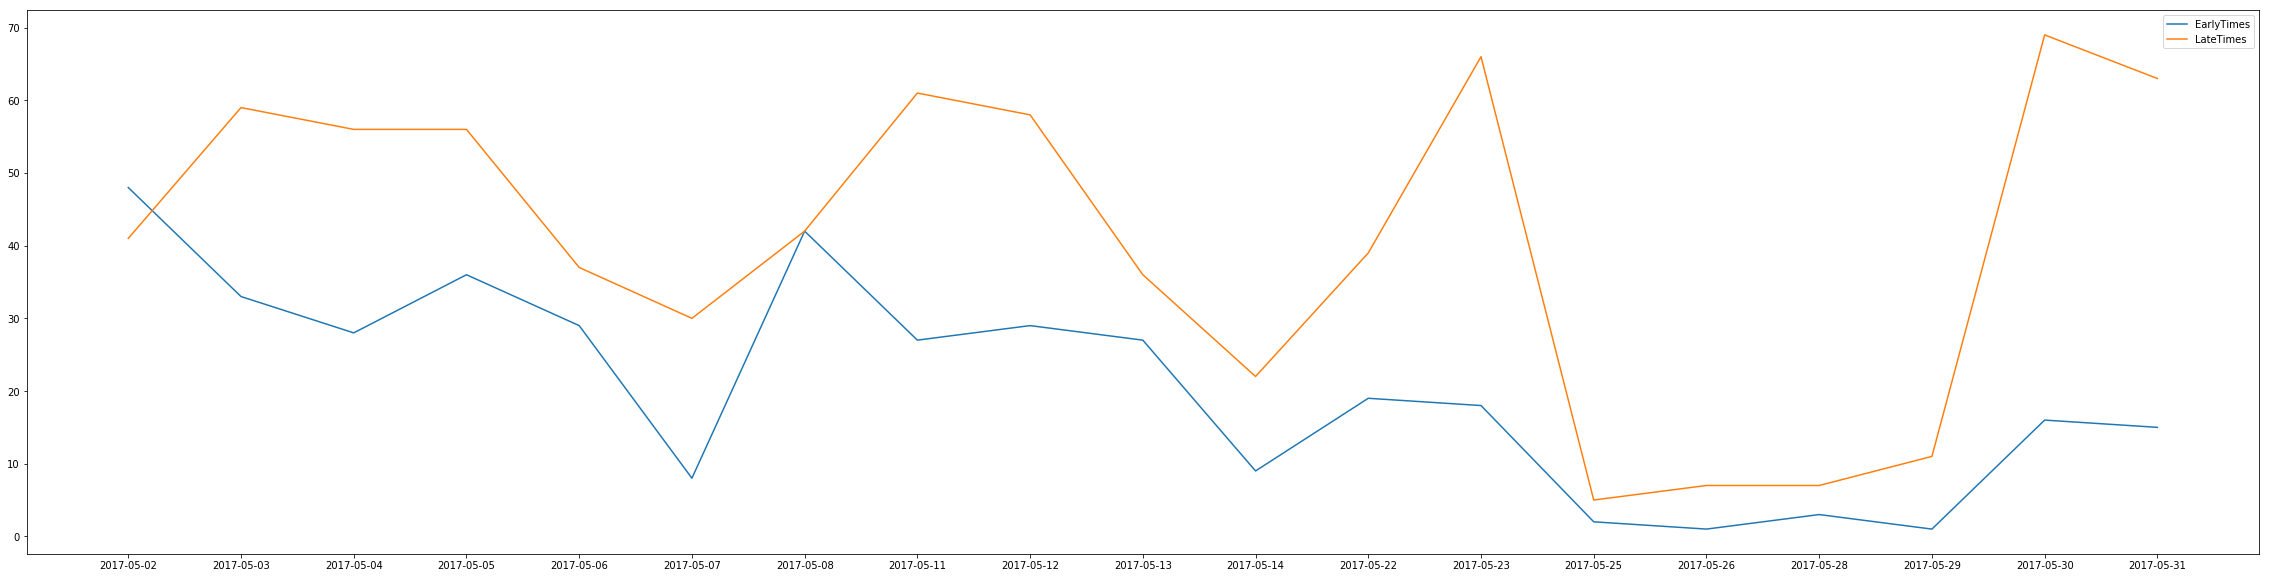

In [12]:
ax = my_plot[['EarlyTimes', 'LateTimes']].plot(xticks=plot_df.index, figsize=(40,10))
ax.set_xticklabels(my_plot.Date)

In [ ]:
plt.figure()
plot_df.plot(figsize=(30, 10))